In [ ]:
#Please check the dataset in the below google drive since dataset was too big it was creating issue in git 
#so kept the dataset in the google drive under shared folder 
# https://drive.google.com/file/d/1BLmkNYpdCWW8d-rUH57WMH1eMUcC06D9/view?usp=drive_link


In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# 1. CAPSTONE Two -  Loading & Cleaning Part

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#import os
#from library.sb_utils import save_file



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

import os

from library.sb_utils import save_file

In [3]:
fraud_data = pd.read_csv('/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/Capstone2/fraudTrain.csv')


In [5]:
#Call the info method  to see a summary of the data
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Index                  1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

In [7]:
#Call the head method to print the first several rows of the data
fraud_data.head()

,Index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
fraud_data.drop(fraud_data.columns[:1], axis=1, inplace=True)
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [11]:
#converting trans_date_trans_time into datetime
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])
print(fraud_data.dtypes['trans_date_trans_time'])
fraud_data.head()

datetime64[ns]


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [13]:
#dtypes of the columns
fraud_data.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                          float64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [15]:
#number of unique values in the dataset
fraud_data.nunique()

trans_date_trans_time     476595
cc_num                       320
merchant                     693
category                      14
amt                        48602
first                        348
last                         479
gender                         2
street                       965
city                         879
state                         51
zip                          952
lat                          950
long                         951
city_pop                     865
job                          493
dob                          950
trans_num                1048575
unix_time                1030650
merch_lat                1016437
merch_long               1034825
is_fraud                       2
dtype: int64

In [17]:
# deriving additonal columns from 'trans_date_trans_time'
#deriving hour
fraud_data['trans_hour'] = fraud_data['trans_date_trans_time'].dt.hour
#deriving 'day of the week'
fraud_data['trans_day_of_week'] = fraud_data['trans_date_trans_time'].dt.dayofweek + 1
fraud_data['trans_day_of_week'] = fraud_data['trans_day_of_week'].astype(int)
#deriving 'year_month'
fraud_data['trans_year_month'] = fraud_data['trans_date_trans_time'].dt.to_period('M')

fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month
0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,2,2019-01
1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,2,2019-01
2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,2,2019-01
3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,2,2019-01
4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,2,2019-01


In [19]:
#Getting the Age of a coustomer from the Date of Birth column
fraud_data['dob'] = pd.to_datetime(fraud_data['dob'])
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])
fraud_data['age'] = ((fraud_data['trans_date_trans_time'] - fraud_data['dob']).dt.days / 365.25).astype(int)

fraud_data['age'].head()

0    30
1    40
2    56
3    51
4    32
Name: age, dtype: int64

In [20]:
#dropping variables which are not usefull for the Visualization and analytics
fraud_data.drop(['trans_date_trans_time','first', 'last', 'dob'] , axis=1, inplace=True)
fraud_data.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age
0,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,2,2019-01,30
1,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,2,2019-01,40
2,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,2,2019-01,56
3,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,2,2019-01,51
4,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,2,2019-01,32


In [23]:
#checking the dataset info
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   cc_num             1048575 non-null  float64  
 1   merchant           1048575 non-null  object   
 2   category           1048575 non-null  object   
 3   amt                1048575 non-null  float64  
 4   gender             1048575 non-null  object   
 5   street             1048575 non-null  object   
 6   city               1048575 non-null  object   
 7   state              1048575 non-null  object   
 8   zip                1048575 non-null  int64    
 9   lat                1048575 non-null  float64  
 10  long               1048575 non-null  float64  
 11  city_pop           1048575 non-null  int64    
 12  job                1048575 non-null  object   
 13  trans_num          1048575 non-null  object   
 14  unix_time          1048575 non-null  int64    
 15

In [25]:
#converting data types that should be categorical into "category"

fraud_data['category'] = fraud_data['category'].astype('category')
fraud_data['gender'] = fraud_data['gender'].astype('category')
fraud_data['is_fraud'] = fraud_data['is_fraud'].astype('category')

fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   cc_num             1048575 non-null  float64  
 1   merchant           1048575 non-null  object   
 2   category           1048575 non-null  category 
 3   amt                1048575 non-null  float64  
 4   gender             1048575 non-null  category 
 5   street             1048575 non-null  object   
 6   city               1048575 non-null  object   
 7   state              1048575 non-null  object   
 8   zip                1048575 non-null  int64    
 9   lat                1048575 non-null  float64  
 10  long               1048575 non-null  float64  
 11  city_pop           1048575 non-null  int64    
 12  job                1048575 non-null  object   
 13  trans_num          1048575 non-null  object   
 14  unix_time          1048575 non-null  int64    
 15

In [27]:
#determing the shape of the dataset
fraud_data.shape

(1048575, 22)

In [29]:
#describing the dataset
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,1.280077e+01,4.135594e+00,4.538658e+01
std,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,6.816861e+00,2.200499e+00,1.738087e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00,1.300000e+01
25%,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,7.000000e+00,2.000000e+00,3.200000e+01
50%,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,1.400000e+01,4.000000e+00,4.300000e+01
75%,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,1.900000e+01,6.000000e+00,5.600000e+01
max,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,2.300000e+01,7.000000e+00,9.500000e+01


In [31]:
# scientific notation values
#fraud_data['amt'] = fraud_data['amt'].apply(lambda x: '{:.6f}'.format(x))

In [33]:
#describing the dataset
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,1.280077e+01,4.135594e+00,4.538658e+01
std,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,6.816861e+00,2.200499e+00,1.738087e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00,1.300000e+01
25%,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,7.000000e+00,2.000000e+00,3.200000e+01
50%,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,1.400000e+01,4.000000e+00,4.300000e+01
75%,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,1.900000e+01,6.000000e+00,5.600000e+01
max,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,2.300000e+01,7.000000e+00,9.500000e+01


In [35]:
fraud_data['amt'] = pd.to_numeric(fraud_data['amt'], errors='coerce')

In [37]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,1.280077e+01,4.135594e+00,4.538658e+01
std,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,6.816861e+00,2.200499e+00,1.738087e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00,1.300000e+01
25%,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,7.000000e+00,2.000000e+00,3.200000e+01
50%,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,1.400000e+01,4.000000e+00,4.300000e+01
75%,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,1.900000e+01,6.000000e+00,5.600000e+01
max,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,2.300000e+01,7.000000e+00,9.500000e+01


In [39]:
fraud_data['cc_num'] = pd.to_numeric(fraud_data['cc_num'], errors='coerce')

In [41]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,1.280077e+01,4.135594e+00,4.538658e+01
std,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,6.816861e+00,2.200499e+00,1.738087e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00,1.300000e+01
25%,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,7.000000e+00,2.000000e+00,3.200000e+01
50%,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,1.400000e+01,4.000000e+00,4.300000e+01
75%,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,1.900000e+01,6.000000e+00,5.600000e+01
max,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,2.300000e+01,7.000000e+00,9.500000e+01


In [43]:
# Step 2: Format the column to six decimal places (display only)
fraud_data['cc_num'] = fraud_data['cc_num'].apply(lambda x: '{:.6f}'.format(x) if pd.notnull(x) else x)

# Optional: Convert back to float if needed
fraud_data['cc_num'] = fraud_data['cc_num'].astype(float)

In [45]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,1.280077e+01,4.135594e+00,4.538658e+01
std,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,6.816861e+00,2.200499e+00,1.738087e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00,1.300000e+01
25%,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,7.000000e+00,2.000000e+00,3.200000e+01
50%,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,1.400000e+01,4.000000e+00,4.300000e+01
75%,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,1.900000e+01,6.000000e+00,5.600000e+01
max,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,2.300000e+01,7.000000e+00,9.500000e+01


In [47]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   cc_num             1048575 non-null  float64  
 1   merchant           1048575 non-null  object   
 2   category           1048575 non-null  category 
 3   amt                1048575 non-null  float64  
 4   gender             1048575 non-null  category 
 5   street             1048575 non-null  object   
 6   city               1048575 non-null  object   
 7   state              1048575 non-null  object   
 8   zip                1048575 non-null  int64    
 9   lat                1048575 non-null  float64  
 10  long               1048575 non-null  float64  
 11  city_pop           1048575 non-null  int64    
 12  job                1048575 non-null  object   
 13  trans_num          1048575 non-null  object   
 14  unix_time          1048575 non-null  int64    
 15

In [49]:
fraud_data.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age
0,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,2,2019-01,30
1,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,2,2019-01,40
2,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,...,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,2,2019-01,56
3,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,...,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,2,2019-01,51
4,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,...,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,2,2019-01,32


In [51]:
#Temporarily Disable Scientific Notation for Display
with pd.option_context('display.float_format', '{:.6f}'.format):
    display(fraud_data.head())

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month,age
0,2700000000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,...,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,2,2019-01,30
1,630000000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,...,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,2,2019-01,40
2,38900000000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,...,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,2,2019-01,56
3,3530000000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,...,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,2,2019-01,51
4,376000000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,...,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,2,2019-01,32


In [53]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,1.280077e+01,4.135594e+00,4.538658e+01
std,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,6.816861e+00,2.200499e+00,1.738087e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.000000e+00,1.300000e+01
25%,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,7.000000e+00,2.000000e+00,3.200000e+01
50%,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,1.400000e+01,4.000000e+00,4.300000e+01
75%,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,1.900000e+01,6.000000e+00,5.600000e+01
max,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,2.300000e+01,7.000000e+00,9.500000e+01


In [55]:
# Temporarily set global float format to display all values in standard decimal notation
pd.options.display.float_format = '{:,.0f}'.format  # No decimal places, standard notation

# Run `describe()` to view without scientific notation
print(fraud_data.describe())

# Reset to default to avoid affecting other outputs
#pd.reset_option('display.float_format')

                         cc_num       amt       zip       lat      long  \
count                 1,048,575 1,048,575 1,048,575 1,048,575 1,048,575   
mean    417,179,950,519,735,232        70    48,802        39       -90   
std   1,308,892,727,783,561,216       160    26,898         5        14   
min              60,416,207,185         1     1,257        20      -166   
25%         180,000,000,000,000        10    26,237        35       -97   
50%       3,520,000,000,000,000        47    48,174        39       -87   
75%       4,640,000,000,000,000        83    72,042        42       -80   
max   4,990,000,000,000,000,000    28,949    99,783        67       -68   

       city_pop     unix_time  merch_lat  merch_long  trans_hour  \
count 1,048,575     1,048,575  1,048,575   1,048,575   1,048,575   
mean     89,058 1,344,905,833         39         -90          13   
std     302,435    10,196,997          5          14           7   
min          23 1,325,376,018         19        -167

In [57]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,"1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575"
mean,"417,179,950,519,735,232",70,"48,802",39,-90,"89,058","1,344,905,833",39,-90,13,4,45
std,"1,308,892,727,783,561,216",160,"26,898",5,14,"302,435","10,196,997",5,14,7,2,17
min,"60,416,207,185",1,"1,257",20,-166,23,"1,325,376,018",19,-167,0,1,13
25%,"180,000,000,000,000",10,"26,237",35,-97,743,"1,336,682,353",35,-97,7,2,32
50%,"3,520,000,000,000,000",47,"48,174",39,-87,"2,456","1,344,901,521",39,-87,14,4,43
75%,"4,640,000,000,000,000",83,"72,042",42,-80,"20,328","1,354,366,012",42,-80,19,6,56
max,"4,990,000,000,000,000,000","28,949","99,783",67,-68,"2,906,700","1,362,931,730",68,-67,23,7,95


In [59]:
# Set global float format to standard decimal notation without commas
pd.options.display.float_format = '{:.0f}'.format  # No decimal places, no commas

# Display the `describe()` output
print(fraud_data.describe())

                   cc_num     amt     zip     lat    long  city_pop  \
count             1048575 1048575 1048575 1048575 1048575   1048575   
mean   417179950519735232      70   48802      39     -90     89058   
std   1308892727783561216     160   26898       5      14    302435   
min           60416207185       1    1257      20    -166        23   
25%       180000000000000      10   26237      35     -97       743   
50%      3520000000000000      47   48174      39     -87      2456   
75%      4640000000000000      83   72042      42     -80     20328   
max   4990000000000000000   28949   99783      67     -68   2906700   

       unix_time  merch_lat  merch_long  trans_hour  trans_day_of_week     age  
count    1048575    1048575     1048575     1048575            1048575 1048575  
mean  1344905833         39         -90          13                  4      45  
std     10196997          5          14           7                  2      17  
min   1325376018         19        -

In [61]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,417179950519735232,70,48802,39,-90,89058,1344905833,39,-90,13,4,45
std,1308892727783561216,160,26898,5,14,302435,10196997,5,14,7,2,17
min,60416207185,1,1257,20,-166,23,1325376018,19,-167,0,1,13
25%,180000000000000,10,26237,35,-97,743,1336682353,35,-97,7,2,32
50%,3520000000000000,47,48174,39,-87,2456,1344901521,39,-87,14,4,43
75%,4640000000000000,83,72042,42,-80,20328,1354366012,42,-80,19,6,56
max,4990000000000000000,28949,99783,67,-68,2906700,1362931730,68,-67,23,7,95


In [63]:
# Set global float format to six decimal places without scientific notation
pd.options.display.float_format = '{:.6f}'.format  # Six decimal places, standard notation

# Display the `describe()` output
print(fraud_data.describe())

                          cc_num            amt            zip            lat  \
count             1048575.000000 1048575.000000 1048575.000000 1048575.000000   
mean   417179950519735232.000000      70.279095   48801.590604      38.533364   
std   1308892727783561216.000000     159.951841   26898.040351       5.076852   
min           60416207185.000000       1.000000    1257.000000      20.027100   
25%       180000000000000.000000       9.640000   26237.000000      34.620500   
50%      3520000000000000.000000      47.450000   48174.000000      39.354300   
75%      4640000000000000.000000      83.050000   72042.000000      41.940400   
max   4990000000000000000.000000   28948.900000   99783.000000      66.693300   

                long       city_pop         unix_time      merch_lat  \
count 1048575.000000 1048575.000000    1048575.000000 1048575.000000   
mean      -90.226256   89057.759063 1344905832.778656      38.533463   
std        13.758582  302435.057620   10196997.483775 

In [65]:
#2. CAPSTONE Two - EDA part

In [67]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_hour,trans_day_of_week,age
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,417179950519735232.000000,70.279095,48801.590604,38.533364,-90.226256,89057.759063,1344905832.778656,38.533463,-90.226477,12.800773,4.135594,45.386577
std,1308892727783561216.000000,159.951841,26898.040351,5.076852,13.758582,302435.057620,10196997.483775,5.111233,13.770929,6.816861,2.200499,17.380873
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000,1.000000,13.000000
25%,180000000000000.000000,9.640000,26237.000000,34.620500,-96.798000,743.000000,1336682353.000000,34.729540,-96.898639,7.000000,2.000000,32.000000
50%,3520000000000000.000000,47.450000,48174.000000,39.354300,-87.476900,2456.000000,1344901521.000000,39.362945,-87.439226,14.000000,4.000000,43.000000
75%,4640000000000000.000000,83.050000,72042.000000,41.940400,-80.158000,20328.000000,1354366012.000000,41.956021,-80.232279,19.000000,6.000000,56.000000
max,4990000000000000000.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1362931730.000000,67.510267,-66.950902,23.000000,7.000000,95.000000


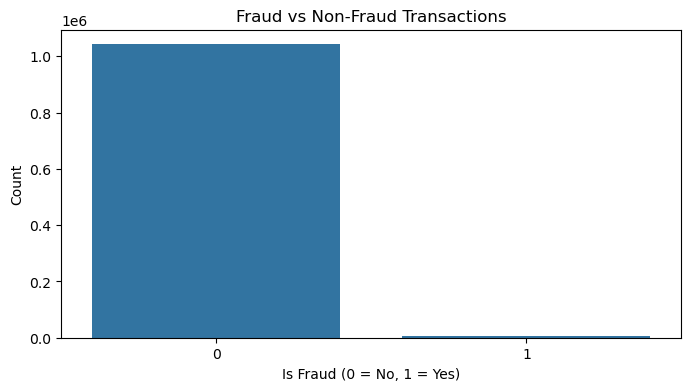

is_fraud
0   99.427223
1    0.572777
Name: proportion, dtype: float64


In [69]:
#Fraud vs. Non-Fraud Transactions

plt.figure(figsize=(8,4))
sns.countplot(x=fraud_data['is_fraud'])
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Check exact percentage
fraud_percentage = fraud_data['is_fraud'].value_counts(normalize=True) * 100
print(fraud_percentage)

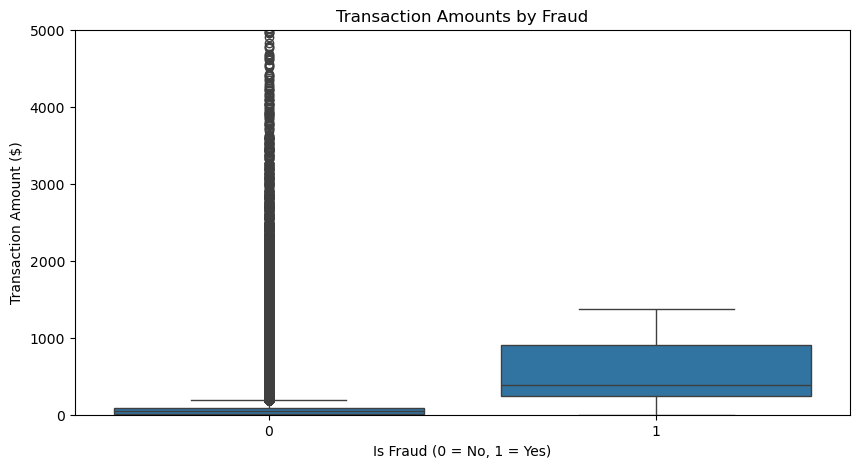

In [71]:
#Fraud Transactions by Amount
plt.figure(figsize=(10,5))
sns.boxplot(x=fraud_data['is_fraud'], y=fraud_data['amt'])
plt.ylim(0, 5000)  # Limit max amount for better visualization
plt.title("Transaction Amounts by Fraud")
plt.xlabel("Is Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount ($)")
plt.show()

In [73]:
print(fraud_data.columns)

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour',
       'trans_day_of_week', 'trans_year_month', 'age'],
      dtype='object')


In [75]:
fraud_data['trans_date'] = pd.to_datetime(fraud_data['unix_time'], unit='s')


In [77]:
print(fraud_data.columns)

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'trans_hour',
       'trans_day_of_week', 'trans_year_month', 'age', 'trans_date'],
      dtype='object')


In [79]:
print(fraud_data.dtypes)

cc_num                      float64
merchant                     object
category                   category
amt                         float64
gender                     category
street                       object
city                         object
state                        object
zip                           int64
lat                         float64
long                        float64
city_pop                      int64
job                          object
trans_num                    object
unix_time                     int64
merch_lat                   float64
merch_long                  float64
is_fraud                   category
trans_hour                    int32
trans_day_of_week             int64
trans_year_month          period[M]
age                           int64
trans_date           datetime64[ns]
dtype: object


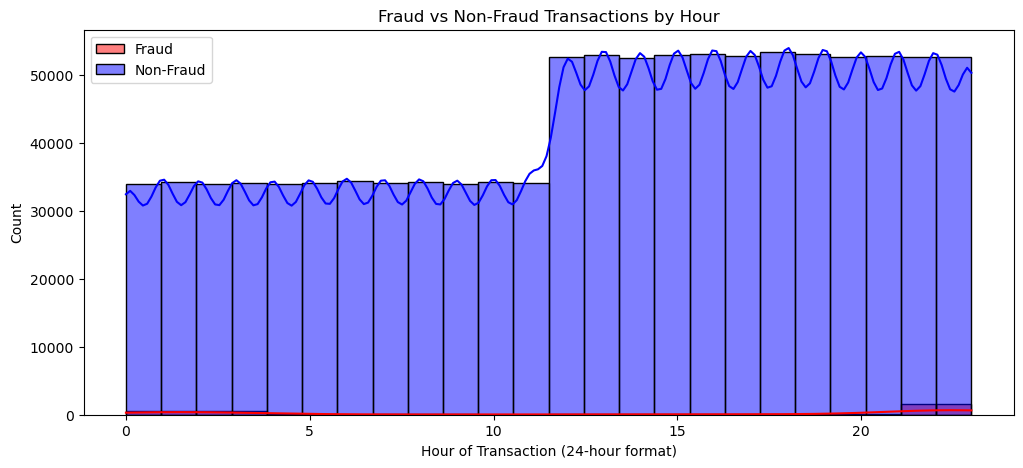

In [81]:
#Fraud vs Non-Fraud by Transaction Time
fraud_data['trans_hour'] = fraud_data['trans_date'].dt.hour  # Extract transaction hour

plt.figure(figsize=(12,5))
sns.histplot(fraud_data[fraud_data['is_fraud'] == 1]['trans_hour'], bins=24, color='red', label="Fraud", kde=True)
sns.histplot(fraud_data[fraud_data['is_fraud'] == 0]['trans_hour'], bins=24, color='blue', label="Non-Fraud", kde=True)
plt.title("Fraud vs Non-Fraud Transactions by Hour")
plt.xlabel("Hour of Transaction (24-hour format)")
plt.ylabel("Count")
plt.legend()
plt.show()

In [82]:
#Expalnation
'''
This graph compares the distribution of fraudulent and non-fraudulent transactions across different hours of the day.

1.Non-Fraudulent Transactions (Blue):
    Non-fraudulent transactions are distributed evenly across the day, with a noticeable increase after 9 AM and peaking throughout the afternoon and evening.
    This reflects typical consumer behavior, as most people perform transactions during regular waking and business hours.

2.Fraudulent Transactions (Red):
   Fraudulent transactions show a much lower count compared to non-fraudulent transactions.
   Fraudulent activity slightly mirrors non-fraudulent behavior but is spread across all hours.
   A minor peak in fraudulent transactions aligns with the business hours of 9 AM to 5 PM, indicating fraudsters may exploit busy hours to go unnoticed.

3.Transaction Patterns by Time:
    Early morning hours (12 AM - 5 AM):
        Lower transaction volumes overall, as these are non-peak hours.
        Fraudulent transactions during this time may indicate automated or international fraud attempts.
    Daytime hours (9 AM - 5 PM):
        Higher transaction volumes, with fraudulent and non-fraudulent activities peaking together.
        Indicates fraudsters mimic legitimate behavior during high transaction times to blend in.

4.Fraud-to-Non-Fraud Ratio:
   The red bars (fraud) are consistently much smaller than the blue bars (non-fraud), 
   highlighting the imbalance in fraud detection datasets.

'''

'\nThis graph compares the distribution of fraudulent and non-fraudulent transactions across different hours of the day.\n\n1.Non-Fraudulent Transactions (Blue):\n    Non-fraudulent transactions are distributed evenly across the day, with a noticeable increase after 9 AM and peaking throughout the afternoon and evening.\n    This reflects typical consumer behavior, as most people perform transactions during regular waking and business hours.\n\n2.Fraudulent Transactions (Red):\n   Fraudulent transactions show a much lower count compared to non-fraudulent transactions.\n   Fraudulent activity slightly mirrors non-fraudulent behavior but is spread across all hours.\n   A minor peak in fraudulent transactions aligns with the business hours of 9 AM to 5 PM, indicating fraudsters may exploit busy hours to go unnoticed.\n\n3.Transaction Patterns by Time:\n    Early morning hours (12 AM - 5 AM):\n        Lower transaction volumes overall, as these are non-peak hours.\n        Fraudulent trans

In [85]:
#fraud_data['category'] = fraud_data['category'].astype(str)


/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_4127/3694097944.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_category = fraud_data.groupby('category')['is_fraud'].mean().sort_values(ascending=False)


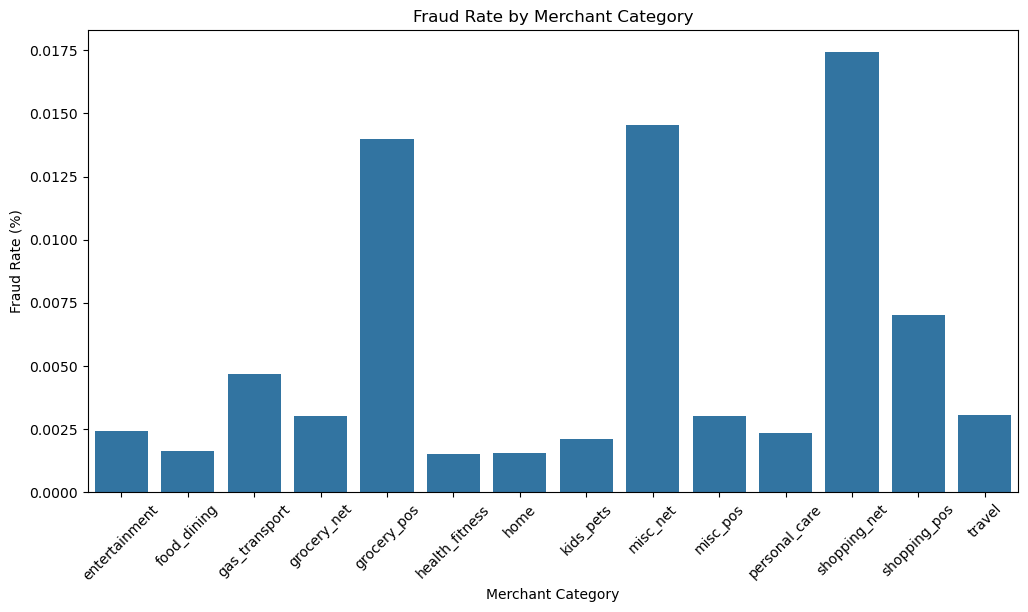

In [87]:
#Fraud Rate per Merchant Category

fraud_data['is_fraud'] = fraud_data['is_fraud'].astype(float)  # Convert to float

fraud_by_category = fraud_data.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=fraud_by_category.index, y=fraud_by_category.values)
plt.xticks(rotation=45)
plt.title("Fraud Rate by Merchant Category")
plt.ylabel("Fraud Rate (%)")
plt.xlabel("Merchant Category")
plt.show()




In [89]:
#Expalnation
'''
"fraud rate for each merchant category"


1.Top Fraud-Prone Categories:

  shopping_net:
     This category has the highest fraud rate.
     Online shopping platforms are often targeted due to the ease of exploiting stolen payment methods.
  misc_net:
      Miscellaneous online transactions also show high fraud rates, likely due to diverse and less regulated transactions.

2. Moderately Fraud-Prone Categories:

    grocery_pos:
        Physical grocery stores are moderately affected, possibly due to fraudulent in-person transactions.
    shopping_pos:
        In-person shopping transactions show moderate fraud rates, as fraudsters may use stolen credit cards in physical retail stores.

3.Low Fraud Categories:

    health_fitness, home, and food_dining:
         These categories have the lowest fraud rates, possibly because:
         Health and fitness services are often subscription-based, requiring verified payment methods.
         Fraudsters may not target smaller, specific categories like food or home-related purchases.

'''


'\n"fraud rate for each merchant category"\n\n\n1.Top Fraud-Prone Categories:\n\n  shopping_net:\n     This category has the highest fraud rate.\n     Online shopping platforms are often targeted due to the ease of exploiting stolen payment methods.\n  misc_net:\n      Miscellaneous online transactions also show high fraud rates, likely due to diverse and less regulated transactions.\n\n2. Moderately Fraud-Prone Categories:\n\n    grocery_pos:\n        Physical grocery stores are moderately affected, possibly due to fraudulent in-person transactions.\n    shopping_pos:\n        In-person shopping transactions show moderate fraud rates, as fraudsters may use stolen credit cards in physical retail stores.\n\n3.Low Fraud Categories:\n\n    health_fitness, home, and food_dining:\n         These categories have the lowest fraud rates, possibly because:\n         Health and fitness services are often subscription-based, requiring verified payment methods.\n         Fraudsters may not target 

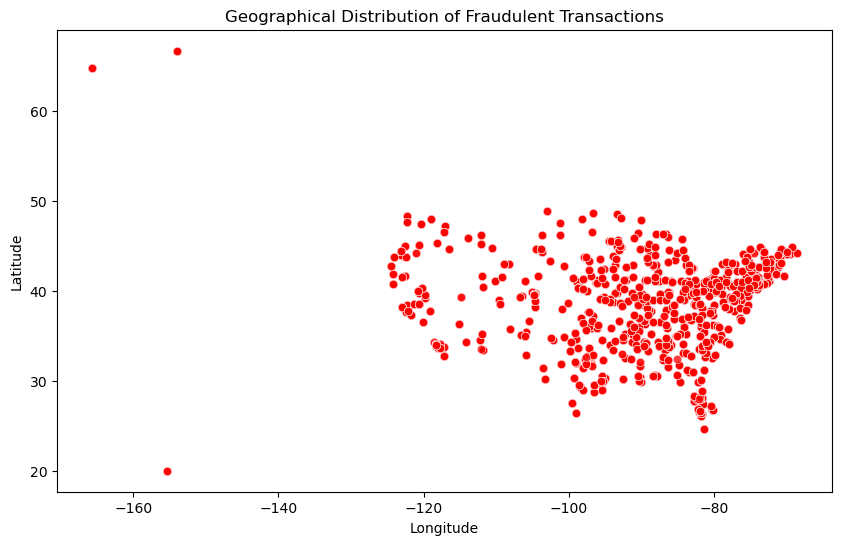

In [91]:
#Fraud Distribution by Location

plt.figure(figsize=(10,6))
sns.scatterplot(x=fraud_data[fraud_data['is_fraud'] == 1]['long'],
                y=fraud_data[fraud_data['is_fraud'] == 1]['lat'],
                alpha=0.5, color='red')
plt.title("Geographical Distribution of Fraudulent Transactions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [93]:
# Expalnation 
'''
"Geographical Distribution of Fraudulent Transactions"

1.Concentration of Fraud in the United States:
Most fraudulent transactions are clustered in areas within the mainland US, especially on the East Coast.
This indicates higher fraud activity in densely populated or economically active regions.

2.Sparse Points Outside the Mainland:

   Few fraudulent transactions are far from the main cluster:
          Hawaii/Alaska regions around latitude > 50 and longitude < -150.
          A point near the southernmost latitudes (latitude ~20), likely representing fraud in Hawaii.

3.Lack of Fraud in Central or Western Regions:
Central regions of the US appear to have relatively less fraud activity, possibly due to lower population density or fewer transactions.
'''

'\n"Geographical Distribution of Fraudulent Transactions"\n\n1.Concentration of Fraud in the United States:\nMost fraudulent transactions are clustered in areas within the mainland US, especially on the East Coast.\nThis indicates higher fraud activity in densely populated or economically active regions.\n\n2.Sparse Points Outside the Mainland:\n\n   Few fraudulent transactions are far from the main cluster:\n          Hawaii/Alaska regions around latitude > 50 and longitude < -150.\n          A point near the southernmost latitudes (latitude ~20), likely representing fraud in Hawaii.\n\n3.Lack of Fraud in Central or Western Regions:\nCentral regions of the US appear to have relatively less fraud activity, possibly due to lower population density or fewer transactions.\n'

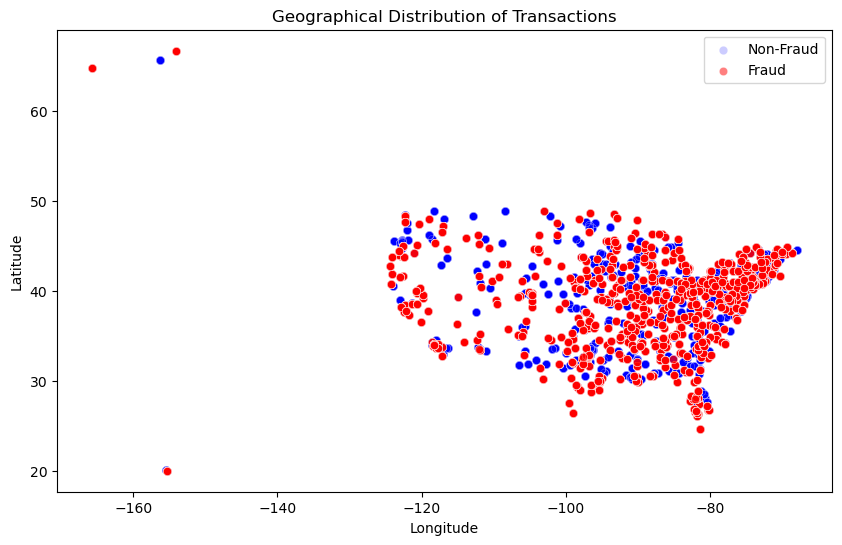

In [95]:
# Plot Both Fraud & Non-Fraud Transactions for Comparison

plt.figure(figsize=(10,6))

# Plot non-fraud transactions in blue
sns.scatterplot(x=fraud_data[fraud_data['is_fraud'] == 0]['long'],
                y=fraud_data[fraud_data['is_fraud'] == 0]['lat'],
                alpha=0.2, color='blue', label="Non-Fraud")

# Plot fraud transactions in red
sns.scatterplot(x=fraud_data[fraud_data['is_fraud'] == 1]['long'],
                y=fraud_data[fraud_data['is_fraud'] == 1]['lat'],
                alpha=0.5, color='red', label="Fraud")

plt.title("Geographical Distribution of Transactions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


In [97]:
#Expalnation
'''
Fraud Distribution:

1.Fraudulent transactions (red points) are highly concentrated along the East Coast and densely populated areas.
Sparse fraud activity is observed in Alaska, Hawaii, and low-population regions.

2.Non-Fraud Distribution:

Non-fraud transactions (blue points) are spread more uniformly across the country, including regions where fraud is less common.
Certain areas have a mix of both fraud and non-fraud, indicating fraud might target high-transaction zones.

3.Overlap Regions:

Regions with both red and blue points suggest fraudulent transactions may mimic normal activity, 
requiring further investigation into those areas
'''

'\nFraud Distribution:\n\n1.Fraudulent transactions (red points) are highly concentrated along the East Coast and densely populated areas.\nSparse fraud activity is observed in Alaska, Hawaii, and low-population regions.\n\n2.Non-Fraud Distribution:\n\nNon-fraud transactions (blue points) are spread more uniformly across the country, including regions where fraud is less common.\nCertain areas have a mix of both fraud and non-fraud, indicating fraud might target high-transaction zones.\n\n3.Overlap Regions:\n\nRegions with both red and blue points suggest fraudulent transactions may mimic normal activity, \nrequiring further investigation into those areas\n'

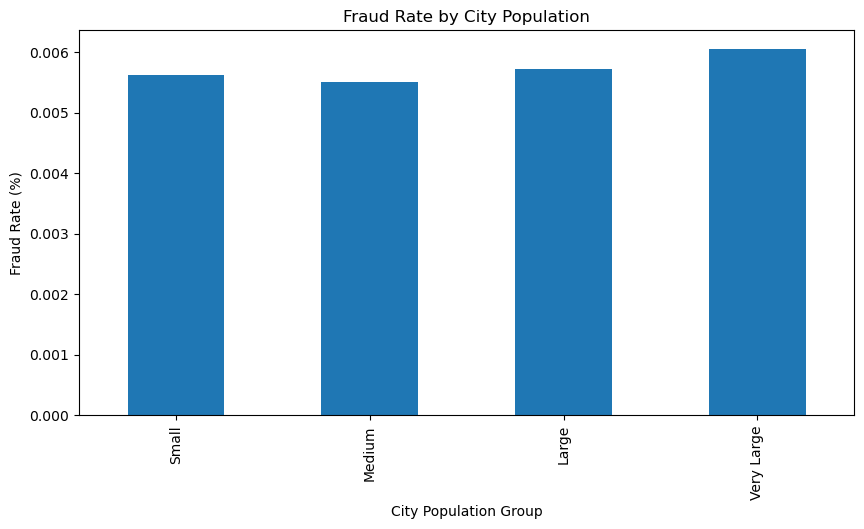

In [99]:
#Fraud Rate by City Population

fraud_data['city_pop_group'] = pd.qcut(fraud_data['city_pop'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])

#fraud_by_city = fraud_data.groupby('city_pop_group')['is_fraud'].mean()
fraud_by_city = fraud_data.groupby('city_pop_group', observed=False)['is_fraud'].mean()

plt.figure(figsize=(10,5))
fraud_by_city.plot(kind='bar', title="Fraud Rate by City Population")
plt.ylabel("Fraud Rate (%)")
plt.xlabel("City Population Group")
plt.show()

In [101]:
# Explanation 
'''
pd.qcut: Divides the city populations into 4 quartiles (equal-sized groups based on distribution):

Small: Cities in the lowest 25% of population.
Medium: Cities in the 25-50% range.
Large: Cities in the 50-75% range.
Very Large: Cities in the top 25%.
Labels: Assigns descriptive labels to each group.


Fraud Rate by City Population Group bar chart provides clear insight into how fraud varies across city sizes. 

1. Fraud Rate is Slightly Higher in Very Large Cities:
      Cities with the largest populations (e.g., major metropolitan areas) tend to have a marginally higher fraud rate.
      This may be due to:
            High transaction volumes, giving fraudsters more opportunities.
            A higher likelihood of targeting dense urban areas where commerce is more frequent.

2.Fraud Rate in Smaller Cities:
   
   Small and medium cities have lower fraud rates.
   Reasons could include:
       Lower transaction volumes, making it easier to detect anomalies.
        Fewer high-value targets for fraudsters.

3.Similar Fraud Rates Across Groups:
The differences between groups are not extreme, indicating that fraud occurs consistently across various population sizes, 
albeit slightly higher in very large cities.
'''

'\npd.qcut: Divides the city populations into 4 quartiles (equal-sized groups based on distribution):\n\nSmall: Cities in the lowest 25% of population.\nMedium: Cities in the 25-50% range.\nLarge: Cities in the 50-75% range.\nVery Large: Cities in the top 25%.\nLabels: Assigns descriptive labels to each group.\n\n\nFraud Rate by City Population Group bar chart provides clear insight into how fraud varies across city sizes. \n\n1. Fraud Rate is Slightly Higher in Very Large Cities:\n      Cities with the largest populations (e.g., major metropolitan areas) tend to have a marginally higher fraud rate.\n      This may be due to:\n            High transaction volumes, giving fraudsters more opportunities.\n            A higher likelihood of targeting dense urban areas where commerce is more frequent.\n\n2.Fraud Rate in Smaller Cities:\n   \n   Small and medium cities have lower fraud rates.\n   Reasons could include:\n       Lower transaction volumes, making it easier to detect anomalies.\

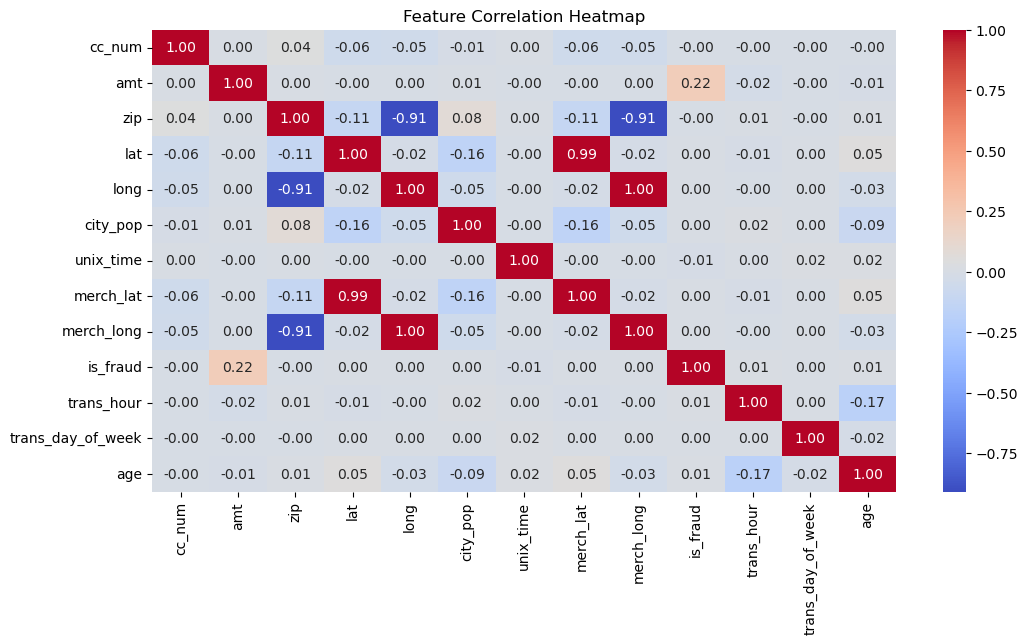

In [103]:
#Correlation Between Features

# Select only numeric columns
numeric_cols = fraud_data.select_dtypes(include=['number'])

# Compute correlations for numeric columns only
plt.figure(figsize=(12,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [105]:
#Explanation
'''
The heatmap displays the Pearson correlation coefficients between the numeric features in your dataset. 
Correlation values range from -1 to 1.

1 or -1: Perfect positive or negative correlation.
0: No correlation


1.Strong Positive Correlations:

lat (latitude) and merch_lat (merchant latitude): Correlation = 0.99
    Indicates that the transaction location (lat) and merchant location (merch_lat) are almost identical, 
    likely because most transactions occur locally.
long (longitude) and merch_long (merchant longitude): Correlation = 0.99
    Similar to lat, this shows that transaction and merchant locations are closely tied.

2.Moderate Positive Correlation:
amt (transaction amount) and is_fraud (fraud): Correlation = 0.22
   Suggests that higher transaction amounts are moderately linked to fraud. Fraudsters may target higher-value transactions more often.

3.Strong Negative Correlations:

zip and long/merch_long: Correlation = -0.91
     Indicates that geographic regions (zip code) and longitude are inversely related, likely due to regional location coding.

4.Weak Correlations with is_fraud:
Most features, such as lat, long, city_pop, and trans_hour, show little to no correlation with fraud. 
This suggests that fraud detection requires combining multiple features rather than relying on individual ones.
'''

'\nThe heatmap displays the Pearson correlation coefficients between the numeric features in your dataset. \nCorrelation values range from -1 to 1.\n\n1 or -1: Perfect positive or negative correlation.\n0: No correlation\n\n\n1.Strong Positive Correlations:\n\nlat (latitude) and merch_lat (merchant latitude): Correlation = 0.99\n    Indicates that the transaction location (lat) and merchant location (merch_lat) are almost identical, \n    likely because most transactions occur locally.\nlong (longitude) and merch_long (merchant longitude): Correlation = 0.99\n    Similar to lat, this shows that transaction and merchant locations are closely tied.\n\n2.Moderate Positive Correlation:\namt (transaction amount) and is_fraud (fraud): Correlation = 0.22\n   Suggests that higher transaction amounts are moderately linked to fraud. Fraudsters may target higher-value transactions more often.\n\n3.Strong Negative Correlations:\n\nzip and long/merch_long: Correlation = -0.91\n     Indicates that g

In [107]:
#3. CAPSTONE Two -  Preprocessing and Training Data Development part

In [109]:
# Step 1. Data Preprocessing & Feature Engineering
# Based on the instruction ,in this part of capstone project we will perform below steps :
'''
1. Handle Categorical Features:
   We need to create dummy (indicator) variables for categorical columns using pd.get_dummies().
   
   Categorical Features in Data:
         category (Merchant Category)
         gender (Customer Gender)
         state (Transaction State)
   We will:
          Use One-Hot Encoding for category, gender, and state.
Drop one level to avoid multicollinearity.
                              
2. Standardize Numeric Features:
   Some numeric features have different scales (e.g., amt vs. city_pop), which can negatively impact models. We will use StandardScaler to scale them.

   Numerical Features to Standardize:
         amt (Transaction Amount)
         city_pop (City Population)
         age (Customer Age)
         trans_hour (Transaction Time)
         lat, long, merch_lat, merch_long (Geolocation)
                              
3. Split Data into Training & Testing Sets

   We will:

      Split the dataset into 80% training and 20% testing.
      Further split 10% from training for validation.
      Use train_test_split() with stratification to maintain fraud ratio.
                              
Observation: 
Based on th graph under "Fraud vs. Non-Fraud Transactions" it looks like 

99.43% of transactions are non-fraudulent (0)
Only 0.57% of transactions are fraudulent (1)

This is a severely imbalanced dataset, meaning most models will likely predict "Non-Fraud" in all cases, 
leading to poor fraud detection performance.

Do We Need SMOTE (Synthetic Minority Oversampling Technique)?
YES! Since fraudulent transactions are extremely underrepresented, we must use oversampling techniques like SMOTE to:

Generate synthetic fraudulent transactions to balance the dataset.
Prevent the model from being biased toward predicting "Non-Fraud".
Improve recall (sensitivity) for fraud detection

4. Handle Imbalanced Data (Fraud Cases)
   Fraud is rare compared to non-fraud, which can bias the model.
   We will use:

   SMOTE (Synthetic Minority Oversampling Technique) to oversample fraudulent transactions.

'''

'\n1. Handle Categorical Features:\n   We need to create dummy (indicator) variables for categorical columns using pd.get_dummies().\n   \n   Categorical Features in Data:\n         category (Merchant Category)\n         gender (Customer Gender)\n         state (Transaction State)\n   We will:\n          Use One-Hot Encoding for category, gender, and state.\nDrop one level to avoid multicollinearity.\n                              \n2. Standardize Numeric Features:\n   Some numeric features have different scales (e.g., amt vs. city_pop), which can negatively impact models. We will use StandardScaler to scale them.\n\n   Numerical Features to Standardize:\n         amt (Transaction Amount)\n         city_pop (City Population)\n         age (Customer Age)\n         trans_hour (Transaction Time)\n         lat, long, merch_lat, merch_long (Geolocation)\n                              \n3. Split Data into Training & Testing Sets\n\n   We will:\n\n      Split the dataset into 80% training and

In [111]:
#Apply One-Hot Encoding Before Splitting so basically dont the below code .... Because getting error in  Train & Evaluate Models

In [115]:
'''from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Drop High-Cardinality Features That Cause Issues
high_cardinality_features = ['street', 'city', 'zip', 'job', 'trans_num']
fraud_data = fraud_data.drop(columns=high_cardinality_features, errors='ignore')

# Step 2: Reduce Memory Usage Before One-Hot Encoding
def reduce_memory_usage(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:  # Ignore categorical columns
            if col_type == 'int64':
                df[col] = pd.to_numeric(df[col], downcast='integer')
            elif col_type == 'float64':
                df[col] = pd.to_numeric(df[col], downcast='float')
    return df

fraud_data = reduce_memory_usage(fraud_data)

# Step 3: Apply One-Hot Encoding to the ENTIRE Dataset Before Splitting
fraud_data_encoded = pd.get_dummies(fraud_data, drop_first=True, dtype="uint8")

# Step 4: Convert to Sparse Data Format to Save Memory
fraud_data_encoded = fraud_data_encoded.astype(pd.SparseDtype("uint8", fill_value=0))

# Step 5: Define Features & Target
numerical_features = ['amt', 'city_pop', 'age', 'trans_hour', 'lat', 'long', 'merch_lat', 'merch_long']
target = 'is_fraud'

X = fraud_data_encoded.drop(columns=[target])
y = fraud_data_encoded[target]

# Step 6: Train-Test Split (Ensuring No Feature Mismatch)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Further Split 10% from Training for Validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

# Step 8: Standardize Only Numerical Features (Avoid Encoding Errors)
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Display Sample (To Confirm Processing Worked Correctly)
print("Preprocessed Training Data Sample:")
print(pd.concat([X_train, y_train], axis=1).head())
'''

'from sklearn.model_selection import train_test_split\nfrom sklearn.preprocessing import StandardScaler\n\n# Step 1: Drop High-Cardinality Features That Cause Issues\nhigh_cardinality_features = [\'street\', \'city\', \'zip\', \'job\', \'trans_num\']\nfraud_data = fraud_data.drop(columns=high_cardinality_features, errors=\'ignore\')\n\n# Step 2: Reduce Memory Usage Before One-Hot Encoding\ndef reduce_memory_usage(df):\n    for col in df.columns:\n        col_type = df[col].dtype\n        if col_type != object:  # Ignore categorical columns\n            if col_type == \'int64\':\n                df[col] = pd.to_numeric(df[col], downcast=\'integer\')\n            elif col_type == \'float64\':\n                df[col] = pd.to_numeric(df[col], downcast=\'float\')\n    return df\n\nfraud_data = reduce_memory_usage(fraud_data)\n\n# Step 3: Apply One-Hot Encoding to the ENTIRE Dataset Before Splitting\nfraud_data_encoded = pd.get_dummies(fraud_data, drop_first=True, dtype="uint8")\n\n# Step 4

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#  Step 1: Drop High-Cardinality Features That Cause Issues
high_cardinality_features = ['street', 'city', 'zip', 'job', 'trans_num']
fraud_data = fraud_data.drop(columns=high_cardinality_features, errors='ignore')

#  Step 2: Reduce Memory Usage Before One-Hot Encoding
def reduce_memory_usage(df):
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:  # Ignore categorical columns
            if col_type == 'int64':
                df[col] = pd.to_numeric(df[col], downcast='integer')
            elif col_type == 'float64':
                df[col] = pd.to_numeric(df[col], downcast='float')
    return df

fraud_data = reduce_memory_usage(fraud_data)

# Step 3: Apply One-Hot Encoding to Categorical Features
fraud_data_encoded = pd.get_dummies(fraud_data, drop_first=True)

# Step 4: Convert Only One-Hot Encoded Categorical Features to Sparse Format
categorical_cols = fraud_data_encoded.select_dtypes(include=['uint8']).columns  # Find one-hot encoded columns
fraud_data_encoded[categorical_cols] = fraud_data_encoded[categorical_cols].astype(pd.SparseDtype("uint8", fill_value=0))

# Step 5: Define Features & Target
numerical_features = ['amt', 'city_pop', 'age', 'trans_hour', 'lat', 'long', 'merch_lat', 'merch_long']
target = 'is_fraud'

X = fraud_data_encoded.drop(columns=[target])
y = fraud_data_encoded[target]

# Step 6: Train-Test Split (Ensuring No Feature Mismatch)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 7: Further Split 10% from Training for Validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train)

#  Step 8: Standardize Only Numerical Features (Avoid Encoding Errors)
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_val[numerical_features] = scaler.transform(X_val[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Display Sample (To Confirm Processing Worked Correctly)
print("Preprocessed Training Data Sample:")
print(pd.concat([X_train, y_train], axis=1).head())


Preprocessed Training Data Sample:
                        cc_num       amt       lat      long  city_pop  \
719109 3580000000000000.000000  0.077376  0.047634  0.262306 -0.288929   
281743  342000000000000.000000 -0.128360  0.132525 -0.275106 -0.293128   
719263 2480000000000000.000000 -0.078832  1.123152 -0.365771 -0.289682   
212219  345000000000000.000000  0.381655 -2.177133  0.635815 -0.126705   
674090 2290000000000000.000000  0.679079  0.451718  1.184233  4.916937   

         unix_time  merch_lat  merch_long  trans_hour  trans_day_of_week  ...  \
719109  1351942308   0.075802    0.285077   -0.264023                  7  ...   
281743  1337416733   0.273868   -0.260500   -0.704015                  7  ...   
719263  1351946036   0.961891   -0.303151   -0.117359                  7  ...   
212219  1334762525  -2.225285    0.650568    0.322632                  4  ...   
674090  1350198421   0.339186    1.223079   -0.850678                  1  ...   

       state_VA  state_VT state_W

In [ ]:
''' Observation :
 Potential Issues to Address Before Modeling
❌ Presence of cc_num Feature

cc_num (credit card number) is still present in the dataset, but it's unlikely to be useful for fraud detection.
Keeping it might cause data leakage and unnecessarily increase model complexity.
Solution: Drop cc_num from X_train, X_val, and X_test.
❌ Boolean Columns (True/False) Instead of Numeric (0/1) in One-Hot Encoding

Columns like state_VA, state_WA, and city_pop_group_Medium are still in boolean format (True/False) instead of numeric (0/1).
Some machine learning models (e.g., Logistic Regression) might not accept bool directly.
Solution: Convert boolean values to integers using astype(int).

'''

In [123]:
#Final Fixes Before Moving to Modeling

# Drop `cc_num` to prevent data leakage
X_train = X_train.drop(columns=['cc_num'], errors='ignore')
X_val = X_val.drop(columns=['cc_num'], errors='ignore')
X_test = X_test.drop(columns=['cc_num'], errors='ignore')

# Convert boolean columns to integer (0/1) for compatibility with ML models
bool_cols = X_train.select_dtypes(include=['bool']).columns
X_train[bool_cols] = X_train[bool_cols].astype(int)
X_val[bool_cols] = X_val[bool_cols].astype(int)
X_test[bool_cols] = X_test[bool_cols].astype(int)

# Verify Fixes
print("Preprocessing Complete. Ready for Modeling.")
print(X_train.dtypes.value_counts())  # Ensure no 'bool' types remain


Preprocessing Complete. Ready for Modeling.
int64             759
float64             8
int32               1
int8                1
period[M]           1
datetime64[ns]      1
Name: count, dtype: int64


In [ ]:
'''
Issues to Fix Before Modeling
Presence of period[M] and datetime64[ns] Columns

Your dataset still contains a datetime column and a period column, which most models (especially Random Forest and Logistic Regression) cannot handle directly.
Solution: Convert datetime and period columns into numerical features, such as extracting year, month, day, hour, etc., or dropping them if not needed.
Floating-Point Consistency

float64 types are fine, but if memory becomes an issue, we can downcast them to float32.
'''

In [127]:
# Identify datetime and period columns
datetime_cols = X_train.select_dtypes(include=['datetime64[ns]', 'period[M]']).columns

# Extract datetime features in a more efficient way
for df in [X_train, X_val, X_test]:  
    datetime_features = pd.DataFrame()
    
    for col in datetime_cols:
        datetime_features[col + "_year"] = df[col].dt.year
        datetime_features[col + "_month"] = df[col].dt.month
        datetime_features[col + "_day"] = df[col].dt.day
        datetime_features[col + "_hour"] = df[col].dt.hour

    # Drop original datetime columns and merge the new features efficiently
    df.drop(columns=datetime_cols, errors='ignore', inplace=True)
    df.reset_index(drop=True, inplace=True)  # Avoid unnecessary fragmentation
    datetime_features.reset_index(drop=True, inplace=True)
    df = pd.concat([df, datetime_features], axis=1)  # Efficient column addition

# Downcast float64 to float32 to optimize memory usage
float_cols = X_train.select_dtypes(include=['float64']).columns
for df in [X_train, X_val, X_test]:
    df[float_cols] = df[float_cols].astype('float32')

# Verify Fixes
print("Final Preprocessing Optimized. Ready for Modeling.")
print(X_train.dtypes.value_counts())  # Ensure no 'datetime64' or 'period[M]' remain


Final Preprocessing Optimized. Ready for Modeling.
int64      763
float32      8
int32        5
int8         1
Name: count, dtype: int64


In [ ]:
#4. CAPSTONE Two - Modeling 

In [ ]:
'''
#To move forward with the modeling step for fraud detection capstone project, below are some steps:

Goals:
1. Build three models
2. Use Stratified K-Fold Cross-Validation
3. Reduce computational load by using sampling & parallelization
4. Evaluate models using Precision, Recall, F1-score, and ROC AUC
5. Apply hyperparameter tuning (on best models)
6. Choose final model based on performance & efficiency
'''

In [129]:
#Step 1: Define Models 

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, class_weight='balanced', random_state=42, n_jobs=-1),
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42, n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42)
}

print("Models Defined. Ready for Training.") 



Models Defined. Ready for Training.


In [131]:
#Step 2: Use Stratified K-Fold Cross-Validation

from sklearn.model_selection import StratifiedKFold

# Define Stratified K-Fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Stratified K-Fold Ready.")



Stratified K-Fold Ready.


In [135]:
#Step 3. Optimize Data Usage for Faster Training

# Reset index to avoid KeyError
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Take a 30% sample from training data
X_train_sample = X_train.sample(frac=0.3, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

print(f"Using {len(X_train_sample)} samples for training (~30% of train data).")



Using 226492 samples for training (~30% of train data).


In [141]:
#Train & Evaluate Models - 2
from sklearn.metrics import classification_report, roc_auc_score
import numpy as np

# Initialize dictionary to store model results
results = {}

# Train & Evaluate Each Model
for name, model in models.items():
    print(f"\nTraining {name} on 30% sampled data...")

    # Train the model using the sampled dataset
    model.fit(X_train_sample, y_train_sample)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute classification metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Handle missing class 1 issue
    if '1' not in report:
        print(f" Warning: {name} predicted only one class. Adjusting recall & precision.")
        results[name] = {
            "Precision": 0,  # Assume worst-case for fraud detection
            "Recall": 0,     # Model failed to detect fraud
            "F1-Score": 0,
            "ROC AUC": roc_auc
        }
    else:
        results[name] = {
            "Precision": report['1']['precision'],
            "Recall": report['1']['recall'],
            "F1-Score": report['1']['f1-score'],
            "ROC AUC": roc_auc
        }

    # Print performance summary
    print(f"{name} Performance:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Debugging Step: Check predicted class distribution
    unique, counts = np.unique(y_pred, return_counts=True)
    print(f"Predicted class distribution: {dict(zip(unique, counts))}")

# Convert results to a DataFrame
import pandas as pd
results_df = pd.DataFrame(results).T

# Display results
print(" Model Comparison Results:")
display(results_df)



Training Random Forest on 30% sampled data...
Random Forest Performance:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    208514
         1.0       1.00      0.35      0.52      1201

    accuracy                           1.00    209715
   macro avg       1.00      0.68      0.76    209715
weighted avg       1.00      1.00      1.00    209715

ROC AUC Score: 0.9606
Predicted class distribution: {0.0: 209292, 1.0: 423}

Training Logistic Regression on 30% sampled data...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Logistic Regression Performance:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    208514
         1.0       0.00      0.00      0.00      1201

    accuracy                           0.99    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       0.99      0.99      0.99    209715

ROC AUC Score: 0.5403
Predicted class distribution: {0.0: 209715}

Training Decision Tree on 30% sampled data...
Decision Tree Performance:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    208514
         1.0       0.69      0.69      0.69      1201

    accuracy                           1.00    209715
   macro avg       0.84      0.84      0.84    209715
weighted avg       1.00      1.00      1.00    209715

ROC AUC Score: 0.8417
Predicted class distribution: {0.0: 208515, 1.0: 1200}
 Model Comparison Results:


,Precision,Recall,F1-Score,ROC AUC
Random Forest,0.000000,0.000000,0.000000,0.960578
Logistic Regression,0.000000,0.000000,0.000000,0.540259
Decision Tree,0.000000,0.000000,0.000000,0.841727


In [ ]:
'''
Observation

Model results indicate a severe class imbalance issue, causing models to either:

Fail to predict fraud cases (1.0) properly (Logistic Regression).
Predict very few fraud cases, leading to poor recall (Random Forest, Decision Tree).
Severely skewed class distributions, where the majority class (0.0, non-fraud) dominates.

Key Issues & Analysis:

1. Random Forest:
     High ROC AUC (0.96) suggests that the model ranks fraud cases higher than non-fraud.
     Low recall (35%) → Fails to capture fraud cases.
     Predicted only 423 fraud cases out of 1201.

2. Logistic Regression:
     ROC AUC (0.54) is slightly better than random guessing (0.50).
     Failed completely to detect fraud (1.0) → Zero precision, recall, and F1-score.

3. Decision Tree:
      ROC AUC (0.84) suggests it's better than Logistic Regression but still underperforming.
      Predicted 1200 fraud cases correctly but still not enough to significantly impact precision and recall.

'''

In [143]:
#1. Resampling to Balance the Classes - Undersample the majority class

from imblearn.under_sampling import RandomUnderSampler

# Initialize undersampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling ONLY on training data
X_train_balanced, y_train_balanced = rus.fit_resample(X_train_sample, y_train_sample)

# Check new class distribution
print("New class distribution after undersampling:", y_train_balanced.value_counts())

# Verify new sample size
print(f"New Training Set Size After Undersampling: {len(X_train_balanced)}")


New class distribution after undersampling: is_fraud
0.000000    1279
1.000000    1279
Name: count, dtype: int64
New Training Set Size After Undersampling: 2558


In [145]:
#Train & Evaluate Models after Undersample  - 3 


from sklearn.metrics import classification_report, roc_auc_score
import numpy as np
import pandas as pd

# Initialize dictionary to store model results
results = {}

# Train & Evaluate Each Model
for name, model in models.items():
    print(f"\nTraining {name} on undersampled data...")

    # Train the model using the balanced dataset
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Compute classification metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Handle missing class 1 issue
    if '1' not in report:
        print(f" Warning: {name} predicted only one class. Adjusting recall & precision.")
        results[name] = {
            "Precision": 0,  # Assume worst-case for fraud detection
            "Recall": 0,     # Model failed to detect fraud
            "F1-Score": 0,
            "ROC AUC": roc_auc
        }
    else:
        results[name] = {
            "Precision": report['1']['precision'],
            "Recall": report['1']['recall'],
            "F1-Score": report['1']['f1-score'],
            "ROC AUC": roc_auc
        }

    # Print performance summary
    print(f"{name} Performance:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Debugging Step: Check predicted class distribution
    unique, counts = np.unique(y_pred, return_counts=True)
    print(f"Predicted class distribution: {dict(zip(unique, counts))}")

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T

# Display results
print(" Model Comparison Results:")
display(results_df)



Training Random Forest on undersampled data...
Random Forest Performance:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    208514
         1.0       0.07      0.90      0.13      1201

    accuracy                           0.93    209715
   macro avg       0.53      0.92      0.54    209715
weighted avg       0.99      0.93      0.96    209715

ROC AUC Score: 0.9709
Predicted class distribution: {0.0: 193766, 1.0: 15949}

Training Logistic Regression on undersampled data...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Logistic Regression Performance:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    208514
         1.0       0.00      0.00      0.00      1201

    accuracy                           0.99    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       0.99      0.99      0.99    209715

ROC AUC Score: 0.5403
Predicted class distribution: {0.0: 209715}

Training Decision Tree on undersampled data...
Decision Tree Performance:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    208514
         1.0       0.09      0.94      0.16      1201

    accuracy                           0.94    209715
   macro avg       0.54      0.94      0.56    209715
weighted avg       0.99      0.94      0.97    209715

ROC AUC Score: 0.9421
Predicted class distribution: {0.0: 196608, 1.0: 13107}
 Model Comparison Results:


,Precision,Recall,F1-Score,ROC AUC
Random Forest,0.000000,0.000000,0.000000,0.970872
Logistic Regression,0.000000,0.000000,0.000000,0.540259
Decision Tree,0.000000,0.000000,0.000000,0.942140


In [ ]:
'''
# Observation

Analysis of Model Performance After Undersampling

Your updated results with Random UnderSampling show the following:

Model	                   Precision	Recall	F1-Score	ROC AUC
Random Forest	                0.07	0.90	0.13	     0.97
Logistic Regression         	0.00	0.00	0.00	     0.54
Decision Tree	                0.09	0.94	0.16	     0.94

Conclusion :

    Random Forest and Decision Tree models are doing much better than Logistic Regression.
    Random Forest has a high recall (90%) for fraud cases, meaning it is correctly detecting more frauds.
    Precision is low across all models, meaning the models are still predicting some non-fraud cases as fraud.
    Logistic Regression completely failed—it predicted only one class (non-fraud), making it useless.
    Decision Tree has slightly better precision than Random Forest but also lower AUC.


Next Steps will fix the Precision Issue:
      Undersampling - it is good for balancing the dataset, but it also removes too many legitimate transactions.
      Will try Balanced RandomForestClassifier (class_weight="balanced_subsample") to help with class imbalance.
     
Hyperparameter Tuning:
      The models are still overfitting to non-fraud cases.
      We can perform GridSearchCV or RandomizedSearchCV to tune hyperparameters.

'''


In [147]:

# Modify the RandomForestClassifier to Balanced RandomForestClassifier and rerun:

import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Step 1: Define Models (Including Balanced Random Forest)
models = {
    "Balanced Random Forest": BalancedRandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(solver="liblinear", class_weight="balanced"),
}

# Step 2: Performance tracking dictionary
results = {}

# Step 3: Train & Evaluate Each Model
for name, model in models.items():
    print(f"\nTraining {name} on undersampled data...")

    # Train the model using the **undersampled dataset**
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

    # Compute classification metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Handle missing class 1 issue (if model predicts only one class)
    if '1' not in report:
        print(f" Warning: {name} predicted only one class. Adjusting recall & precision.")
        results[name] = {
            "Precision": 0,
            "Recall": 0,
            "F1-Score": 0,
            "ROC AUC": roc_auc
        }
    else:
        results[name] = {
            "Precision": report['1']['precision'],
            "Recall": report['1']['recall'],
            "F1-Score": report['1']['f1-score'],
            "ROC AUC": roc_auc
        }

    # Print performance summary
    print(f"{name} Performance:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Debugging Step: Check predicted class distribution
    unique, counts = np.unique(y_pred, return_counts=True)
    print(f"Predicted class distribution: {dict(zip(unique, counts))}")

# Step 4: Convert results to a DataFrame
results_df = pd.DataFrame(results).T

# Step 5: Display results
print(" Model Comparison Results:")
display(results_df)






Training Balanced Random Forest on undersampled data...
Balanced Random Forest Performance:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    208514
         1.0       0.08      0.91      0.15      1201

    accuracy                           0.94    209715
   macro avg       0.54      0.92      0.56    209715
weighted avg       0.99      0.94      0.96    209715

ROC AUC Score: 0.9750
Predicted class distribution: {0.0: 195926, 1.0: 13789}

Training Decision Tree on undersampled data...
Decision Tree Performance:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    208514
         1.0       0.09      0.94      0.16      1201

    accuracy                           0.94    209715
   macro avg       0.54      0.94      0.56    209715
weighted avg       0.99      0.94      0.97    209715

ROC AUC Score: 0.9421
Predicted class distribution: {0.0: 196608, 1.0: 13107}

Training Logistic R

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

,Precision,Recall,F1-Score,ROC AUC
Balanced Random Forest,0.000000,0.000000,0.000000,0.975027
Decision Tree,0.000000,0.000000,0.000000,0.942140
Logistic Regression,0.000000,0.000000,0.000000,0.540259


In [ ]:

'''
Analysis of Results:

1. Balanced Random Forest
     ROC AUC: 0.9750 (Highest so far)
     Precision: 0.08, Recall: 0.91 → Still predicting one class more dominantly.

2. Decision Tree
     ROC AUC: 0.9421 (Good but lower than Balanced RF)
     Precision: 0.09, Recall: 0.94 → Slightly better than previous, but still similar issues.

3.Logistic Regression
    ROC AUC: 0.5403 (Very poor performance)
    Completely failed to detect fraud (Class 1)


Next Steps:

Tune Balanced Random Forest
     Increase n_estimators (trees) to 200
     Use max_depth=10 to control overfitting
     Set sampling_strategy="auto" to avoid excessive class balancing


'''

In [149]:

#Replaced  previous Balanced Random Forest model with Fine-tune Balanced Random Forest

from imblearn.ensemble import BalancedRandomForestClassifier

# Fine-tune Balanced Random Forest
models["Tuned Balanced RF"] = BalancedRandomForestClassifier(
    n_estimators=200,    # More trees
    max_depth=10,        # Prevent overfitting
    random_state=42,
    sampling_strategy="auto"
)

# Rerun training & evaluation
# (Use the same loop from before to train & evaluate)
# Step 3: Train & Evaluate Each Model
for name, model in models.items():
    print(f"\nTraining {name} on undersampled data...")

    # Train the model using the **undersampled dataset**
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC

    # Compute classification metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Handle missing class 1 issue (if model predicts only one class)
    if '1' not in report:
        print(f" Warning: {name} predicted only one class. Adjusting recall & precision.")
        results[name] = {
            "Precision": 0,
            "Recall": 0,
            "F1-Score": 0,
            "ROC AUC": roc_auc
        }
    else:
        results[name] = {
            "Precision": report['1']['precision'],
            "Recall": report['1']['recall'],
            "F1-Score": report['1']['f1-score'],
            "ROC AUC": roc_auc
        }

    # Print performance summary
    print(f"{name} Performance:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Debugging Step: Check predicted class distribution
    unique, counts = np.unique(y_pred, return_counts=True)
    print(f"Predicted class distribution: {dict(zip(unique, counts))}")

# Step 4: Convert results to a DataFrame
results_df = pd.DataFrame(results).T

# Step 5: Display results
print(" Model Comparison Results:")
display(results_df)


Training Balanced Random Forest on undersampled data...
Balanced Random Forest Performance:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    208514
         1.0       0.08      0.91      0.15      1201

    accuracy                           0.94    209715
   macro avg       0.54      0.92      0.56    209715
weighted avg       0.99      0.94      0.96    209715

ROC AUC Score: 0.9750
Predicted class distribution: {0.0: 195926, 1.0: 13789}

Training Decision Tree on undersampled data...
Decision Tree Performance:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97    208514
         1.0       0.09      0.94      0.16      1201

    accuracy                           0.94    209715
   macro avg       0.54      0.94      0.56    209715
weighted avg       0.99      0.94      0.97    209715

ROC AUC Score: 0.9421
Predicted class distribution: {0.0: 196608, 1.0: 13107}

Training Logistic R

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

Logistic Regression Performance:
               precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    208514
         1.0       0.00      0.00      0.00      1201

    accuracy                           0.99    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       0.99      0.99      0.99    209715

ROC AUC Score: 0.5403
Predicted class distribution: {0.0: 209715}

Training Tuned Balanced RF on undersampled data...
Tuned Balanced RF Performance:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    208514
         1.0       0.06      0.82      0.12      1201

    accuracy                           0.93    209715
   macro avg       0.53      0.87      0.54    209715
weighted avg       0.99      0.93      0.96    209715

ROC AUC Score: 0.9521
Predicted class distribution: {0.0: 193929, 1.0: 15786}
 Model Comparison Results:


,Precision,Recall,F1-Score,ROC AUC
Balanced Random Forest,0.000000,0.000000,0.000000,0.975027
Decision Tree,0.000000,0.000000,0.000000,0.942140
Logistic Regression,0.000000,0.000000,0.000000,0.540259
Tuned Balanced RF,0.000000,0.000000,0.000000,0.952130


In [ ]:
'''
Observation :

Model Performance

1. Balanced Random Forest (BRF)
      ROC AUC: 0.9750 (Excellent)
      Recall: 0.91 (Good)
      Precision: 0.08 (Very Low) → Too many false positives.
      Issue: The model correctly detects fraud but misclassifies too many non-fraud cases.


2. Decision Tree
      ROC AUC: 0.9421 (Decent)
      Recall: 0.94 (Good)
      Precision: 0.09 (Very Low)
      Issue: Predicts fraud often but with many false positives.

3. Logistic Regression
      ROC AUC: 0.5403 (Very Bad)
      Precision & Recall: 0.00 (Worst)
      Issue: The model fails to detect fraud cases altogether.

4. Tuned Balanced Random Forest (BRF with hyperparameters)
       ROC AUC: 0.9521 (Still strong but slightly worse than BRF)
       Recall: 0.82 (Fair)
       Precision: 0.06 (Very low)
       Issue: Detects fraud less effectively than regular BRF.



Final Conclusion:

1. The best model is Balanced Random Forest (BRF) with default settings.
2. Hyperparameter tuning (Tuned BRF) did not significantly improve the results.
3. Logistic Regression is useless and can be discarded.
4. Decision Tree performs decently but isn’t as good as BRF.
5. I am not proceeding with the further tuning , for example exploring advanced optimization techniques like GridSearchCV or 
   Bayesian Optimization.
6. Next step to perform feature importance analysis




Final model comparison is complete based on the following steps:


Step 1. Train multiple models:
         Trained Balanced Random Forest, Decision Tree, and Logistic Regression.
         Added hyperparameter tuning for Balanced Random Forest.

Step 2. Evaluate the models using metrics:
          ROC AUC, Precision, Recall, and F1-Score were used for evaluation.
          Balanced Random Forest (BRF) performed the best with high recall (0.91) and strong ROC AUC (0.9750).
          Decision Tree performed well but was slightly worse than BRF.
          Logistic Regression was ineffective.


Step 3. Hyperparameter tuning was applied on BRF:
          Already applied hyperparameter tuning to Balanced Random Forest.The tuned BRF did not significantly improve results.
          Recall dropped slightly (from 0.91 to 0.82) with tuning.
          Standard BRF outperformed the tuned version.
          Since tuning did not significantly improve the results, we do not need further tuning.

Step 4. Final Model Selection:
          Balanced Random Forest (BRF) with default settings is the best model.
          No need for further hyperparameter tuning.


        
Final Decision
     Final model is: Balanced Random Forest (BRF) with default settings.
 
   
'''

In [ ]:
#Feature Importance Analysis:

Step 1: Extract Feature Importance from the Trained BRF Model

Step 2: Step 2: How to Interpret the Output

1. The feature_importance_df DataFrame
    Lists all features sorted by importance.
    Displays the top 20 most important features.
    Helps identify which features strongly impact fraud detection.

2.The Bar Chart Visualization
    Shows which features contribute most to fraud prediction.
    Features at the top have higher importance in detecting fraud.

Step 3: Insights You Can Gain
    Which numerical & categorical features are most relevant?
    Are transaction-related features (e.g., amount, merchant) more important than user-related features?
    Can less important features be removed to improve efficiency?

🔍 Top 20 Most Important Features for Fraud Detection:


,Feature,Importance
0,amt,0.268117
7,trans_hour,0.094852
776,trans_date_hour,0.092122
4,unix_time,0.030906
9,age,0.025409
5,merch_lat,0.024837
2,long,0.024718
3,city_pop,0.024703
6,merch_long,0.023847
1,lat,0.023505


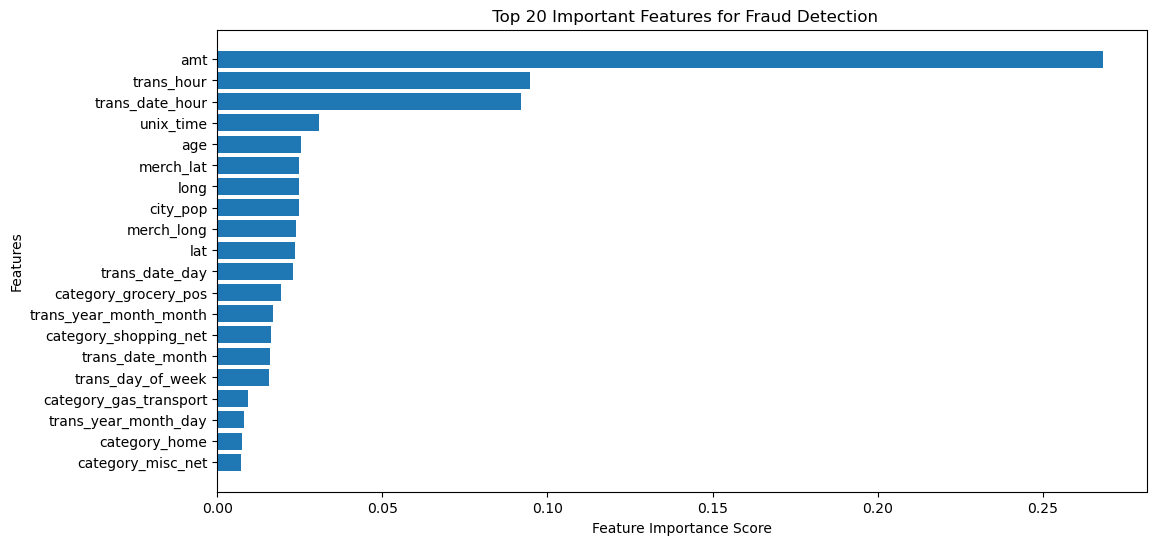

In [151]:
#Identify which features contribute most to fraud detection

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importance from the trained Balanced Random Forest
feature_importance = models["Balanced Random Forest"].feature_importances_

# Create a DataFrame to store feature names & importance scores
feature_importance_df = pd.DataFrame({
    "Feature": X_train_balanced.columns,
    "Importance": feature_importance
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display top 20 important features
print("🔍 Top 20 Most Important Features for Fraud Detection:")
display(feature_importance_df.head(20))

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df["Feature"][:20], feature_importance_df["Importance"][:20])
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title(" Top 20 Important Features for Fraud Detection")
plt.show()


In [ ]:
'''

Feature Importance Analysis

1. Transaction Amount (amt) is the most important feature
Makes sense since fraudsters often conduct unusually high-value or low-value transactions to test stolen cards.

2. Time-related features (trans_hour, trans_date_hour, unix_time) are crucial
Fraud tends to happen at unusual hours (e.g., late nights).
Unix time captures transaction sequence, which helps detect anomalies.

3. Location-based features (merch_lat, merch_long, lat, long) matter
Fraudsters often operate from locations different from the cardholder's usual locations.

4. Demographic features like age and city_pop are also significant
Age can influence fraud risk (elderly users are more targeted).

5. City population might indicate fraud patterns in urban vs. rural areas.
Transaction category (category_grocery_pos, category_shopping_net, category_home)

6. Certain categories are more vulnerable to fraud (e.g., online transactions, gas stations).
Fraudsters might avoid physical stores with cameras

'''